In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr 
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")


file_path = 'BostonHousing.csv'
boston_data = pd.read_csv(file_path)
print(boston_data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


# Describe minimum of 5 variables

CRIM: Crime rate per capita.

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built before 1940.

RAD: Index of accessibility to radial highways.

MEDV: Median value of owner-occupied homes (the target variable).

CHAS: Charles River variable (binary: 0 or 1, but treated as numeric).

In [3]:
print("Original column names:", boston_data.columns)

# Assign new column names
boston_data.columns = ['CrimeRate', 'ResidentialLand', 'NonRetailBusiness', 'CharlesRiver', 
                       'NitrogenOxides', 'AvgRooms', 'HousesAge', 'DistanceToJobs', 
                       'HighwayAccess', 'PropertyTaxRate', 'PupilTeacherRatio', 
                       'AfricanAmericanProportion', 'LowerStatusProportion', 'MedianValue']
print("Renamed column names:", boston_data.columns)

Original column names: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
Renamed column names: Index(['CrimeRate', 'ResidentialLand', 'NonRetailBusiness', 'CharlesRiver',
       'NitrogenOxides', 'AvgRooms', 'HousesAge', 'DistanceToJobs',
       'HighwayAccess', 'PropertyTaxRate', 'PupilTeacherRatio',
       'AfricanAmericanProportion', 'LowerStatusProportion', 'MedianValue'],
      dtype='object')


In [4]:
# Strip any leading or trailing whitespace from column names
boston_data.columns = boston_data.columns.str.strip()

# Histogram of 5 variables – Summary and Analysis

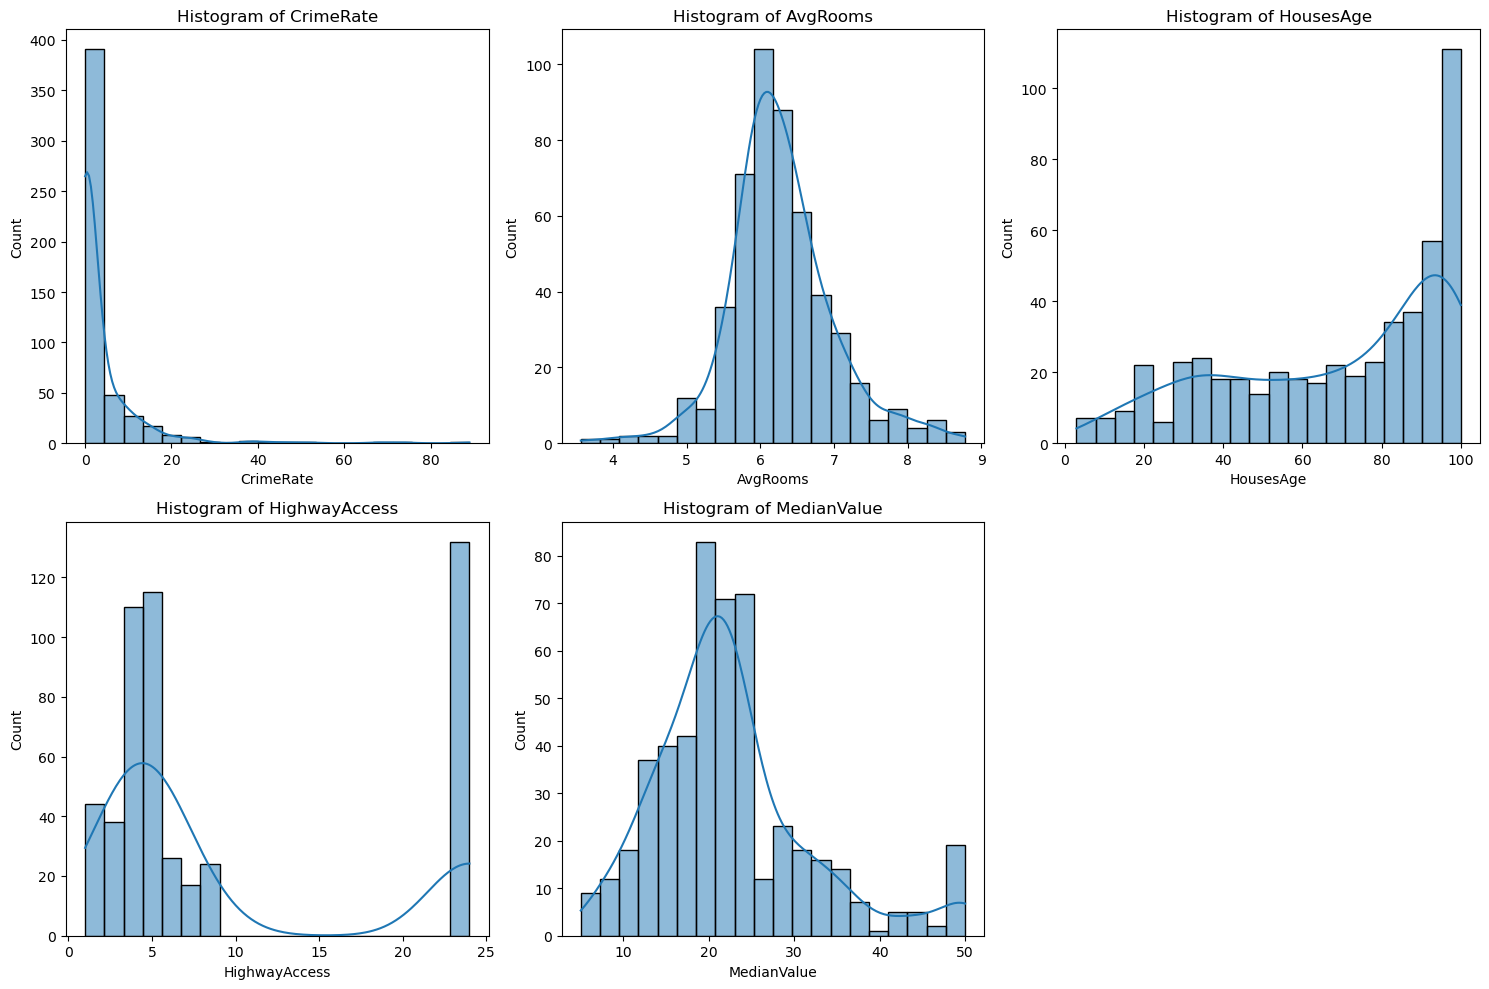

In [6]:
variables = ['CrimeRate', 'AvgRooms', 'HousesAge', 'HighwayAccess', 'MedianValue']

# Plot histograms for the variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(boston_data[var], kde=True, bins=20)
    plt.title(f"Histogram of {var}")

plt.tight_layout()
plt.show()

In [7]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [8]:
# Identify outliers for each variable
outliers = {}
for var in variables:
    outliers[var] = identify_outliers(boston_data, var)

# Display outliers for each variable
for var, outlier_data in outliers.items():
    print(f"Outliers in {var}:")
    print(outlier_data[['CrimeRate', 'AvgRooms', 'HousesAge', 'HighwayAccess', 'MedianValue']].head())

Outliers in CrimeRate:
     CrimeRate  AvgRooms  HousesAge  HighwayAccess  MedianValue
367    13.5222     3.863      100.0             24         23.1
371     9.2323     6.216      100.0             24         50.0
373    11.1081     4.906      100.0             24         13.8
374    18.4982     4.138      100.0             24         13.8
375    19.6091     7.313       97.9             24         15.0
Outliers in AvgRooms:
     CrimeRate  AvgRooms  HousesAge  HighwayAccess  MedianValue
97     0.12083     8.069       76.0              2         38.7
98     0.08187     7.820       36.9              2         43.8
162    1.83377     7.802       98.2              5         50.0
163    1.51902     8.375       93.9              5         50.0
166    2.01019     7.929       96.2              5         50.0
Outliers in HousesAge:
Empty DataFrame
Columns: [CrimeRate, AvgRooms, HousesAge, HighwayAccess, MedianValue]
Index: []
Outliers in HighwayAccess:
Empty DataFrame
Columns: [CrimeRate, AvgR

# Other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails

In [10]:
# Descriptive statistics
descriptive_stats = {}

# Calculate descriptive statistics for each variable
for var in variables:
    statistics = {}
    statistics['Mean'] = boston_data[var].mean()
    statistics['Mode'] = boston_data[var].mode()[0]
    statistics['Range'] = boston_data[var].max() - boston_data[var].min()  # Spread
    Q1 = boston_data[var].quantile(0.25)
    Q3 = boston_data[var].quantile(0.75)
    statistics['IQR'] = Q3 - Q1
    statistics['Skewness'] = boston_data[var].skew()
    statistics['5th Percentile'] = boston_data[var].quantile(0.05)  # Tails check
    statistics['95th Percentile'] = boston_data[var].quantile(0.95)  # Tails Check

    descriptive_stats[var] = statistics

# Print the descriptive statistics
for var, statistics in descriptive_stats.items():
    print(f"\n{var} Descriptive Statistics:")
    for stat, value in statistics.items():
        print(f"{stat}: {value}")


CrimeRate Descriptive Statistics:
Mean: 3.613523557312254
Mode: 0.01501
Range: 88.96988
IQR: 3.5950375
Skewness: 5.223148798243851
5th Percentile: 0.027909999999999997
95th Percentile: 15.78915

AvgRooms Descriptive Statistics:
Mean: 6.28434131736527
Mode: 5.713
Range: 5.218999999999999
IQR: 0.7409999999999997
Skewness: 0.4034215968136547
5th Percentile: 5.304
95th Percentile: 7.61

HousesAge Descriptive Statistics:
Mean: 68.57490118577076
Mode: 100.0
Range: 97.1
IQR: 49.04999999999999
Skewness: -0.5989626398812962
5th Percentile: 17.725
95th Percentile: 100.0

HighwayAccess Descriptive Statistics:
Mean: 9.549407114624506
Mode: 24
Range: 23
IQR: 20.0
Skewness: 1.0048146482182057
5th Percentile: 2.0
95th Percentile: 24.0

MedianValue Descriptive Statistics:
Mean: 22.532806324110677
Mode: 50.0
Range: 45.0
IQR: 7.975000000000001
Skewness: 1.1080984082549072
5th Percentile: 10.2
95th Percentile: 43.4


# Compare two scenarios in data using a PMF. 

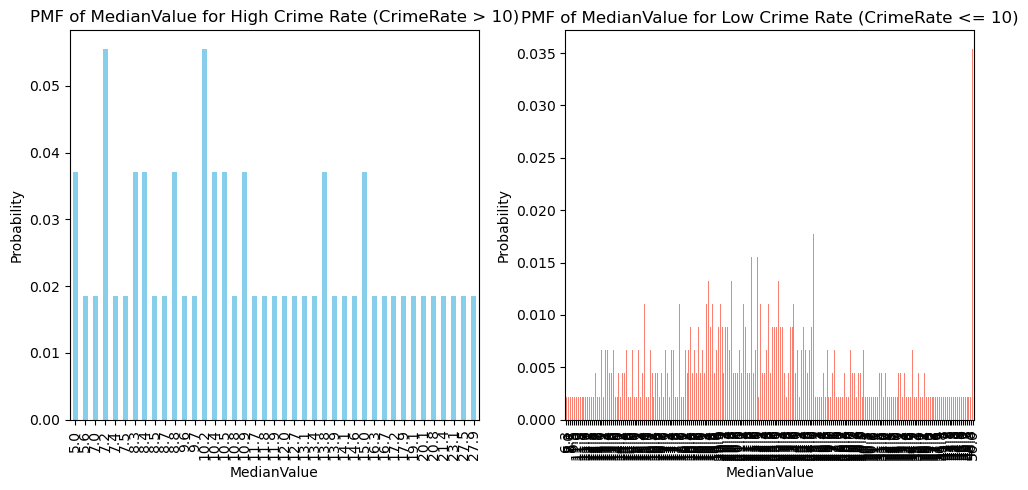

In [12]:
variable = 'MedianValue'
scenario_1 = boston_data[boston_data['CrimeRate'] > 10]
scenario_2 = boston_data[boston_data['CrimeRate'] <= 10]

# PMF for Scenario 1
pmf_scenario_1 = scenario_1[variable].value_counts(normalize=True).sort_index()


# PMF for Scenario 2
pmf_scenario_2 = scenario_2[variable].value_counts(normalize=True).sort_index()

# Plot the PMFs
plt.figure(figsize=(10, 5))

# Plot PMF for Scenario 1
plt.subplot(1, 2, 1)
pmf_scenario_1.plot(kind='bar', color='skyblue')
plt.title(f"PMF of {variable} for High Crime Rate (CrimeRate > 10)")
plt.xlabel(variable)
plt.ylabel('Probability')

# Plot PMF for Scenario 2
plt.subplot(1, 2, 2)
pmf_scenario_2.plot(kind='bar', color='salmon')
plt.title(f"PMF of {variable} for Low Crime Rate (CrimeRate <= 10)")
plt.xlabel(variable)
plt.ylabel('Probability')

plt.tight_layout()
plt.show()


PMF for High Crime Rate (CrimeRate > 10) shows no clear central peak that indicates property values are dispersed across different ranges without a dominant value. Whereas for Low Crime Rate (CrimeRate ≤ 10), there is a peak at the higher end of property values suggesting that neighborhoods with lower crime rates tend to have higher property values.

# 1 CDF with one of the variable "MedianValue"

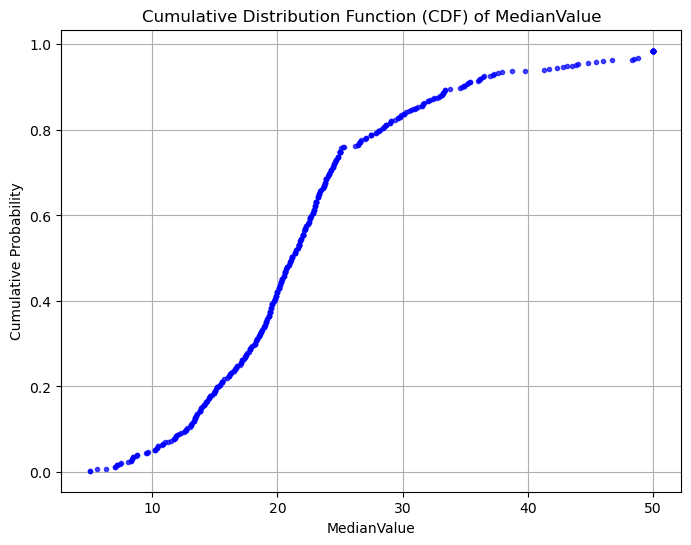

In [15]:
sorted_data = boston_data[variable].sort_values()

# Calculate the CDF by calculating the cumulative probability for each value
cdf = sorted_data.rank() / len(sorted_data)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue', alpha=0.7)
plt.title(f"Cumulative Distribution Function (CDF) of {variable}")
plt.xlabel(variable)
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

This suggests that most median property values fall between 20 and 30 as CDF curve steepens here, with relatively fewer properties valued at lower or higher ends.

# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen

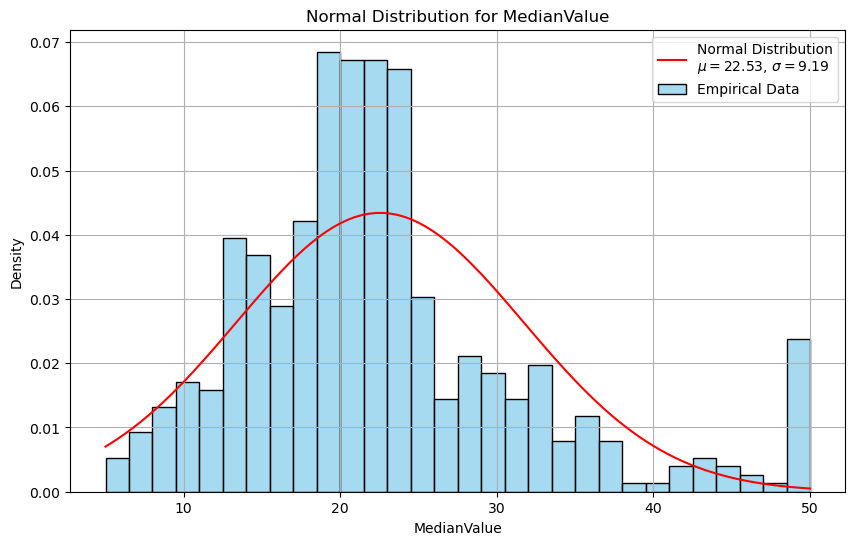

In [18]:
data = boston_data['MedianValue'].dropna()
mu, std = stats.norm.fit(data)    # Calculate mean and standard deviation
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mu, std)

# Plot histogram and the fitted Normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, stat="density", color='skyblue', label='Empirical Data')
plt.plot(x, pdf, 'r-', label=f'Normal Distribution\n$\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.title('Normal Distribution for MedianValue')
plt.xlabel('MedianValue')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


The mean suggests that the typical value is around 22.53.

Standard deviation of 9.19 indicates moderate variability, meaning data points are reasonably dispersed around the mean.

Data appears skewed as we notice right tail and high frequency at 50. This suggests the distribution is not perfectly normal and may require transformations or alternative distributions for better modeling.

# Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis

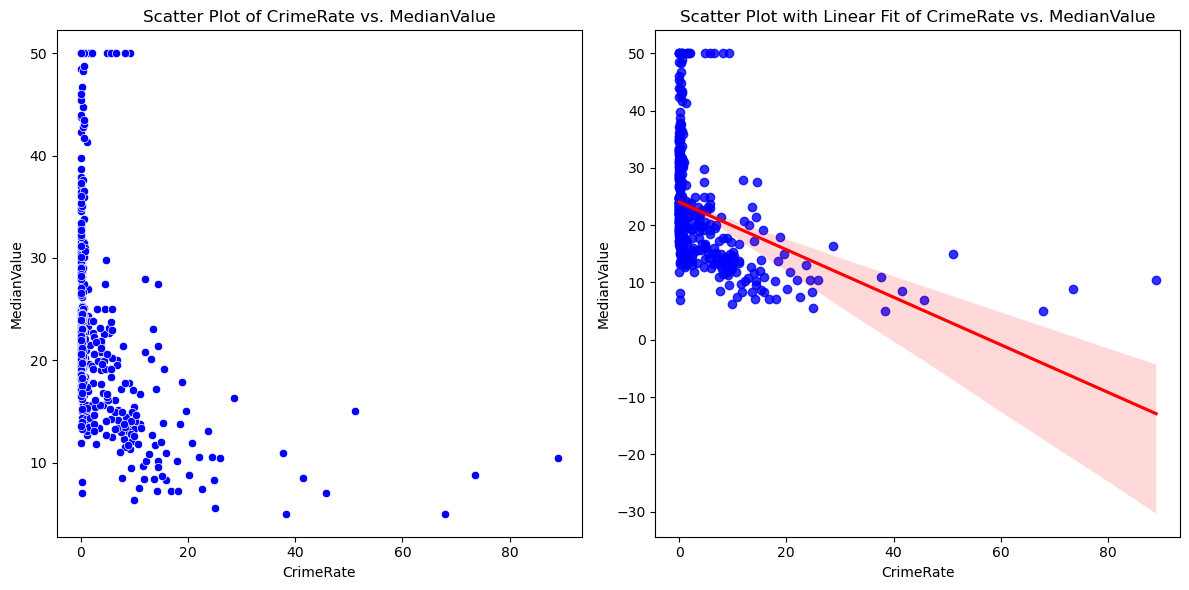

Covariance between CrimeRate and MedianValue: -30.71850796445817
Pearson's Correlation between CrimeRate and MedianValue: -0.39


In [21]:
var1 = 'CrimeRate'  
var2 = 'MedianValue'  
x = boston_data[var1]
y = boston_data[var2]

# Scatter Plot 1: 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=x, y=y, color='blue')
plt.title(f'Scatter Plot of {var1} vs. {var2}')
plt.xlabel(var1)
plt.ylabel(var2)

# Scatter Plot 2 with a linear regression line
plt.subplot(1, 2, 2)
sns.regplot(x=x, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Scatter Plot with Linear Fit of {var1} vs. {var2}')
plt.xlabel(var1)
plt.ylabel(var2)

plt.tight_layout()
plt.show()

covariance = np.cov(x, y)[0][1]   # Calculate Covariance 
pearson_corr, _ = pearsonr(x, y)  # Calculate Pearson's Correlation

# Print the results
print(f"Covariance between {var1} and {var2}: {covariance}")
print(f"Pearson's Correlation between {var1} and {var2}: {pearson_corr:.2f}")


Scatter plot shows a general negative trend - As CrimeRate increases, MedianValue tends to decrease.

In Scatter Plot with Linear Fit, the regression line confirms the negative linear relationship.

The covariance is -30.72, which indicates that when CrimeRate increases, MedianValue tends to decrease.

The Pearson correlation coefficient is -0.39 meaning there is a weak-to-moderate linear relationship between the two variables. However, CrimeRate alone is not a strong predictor of MedianValue; other factors likely play a role.


# Chi-squared Test

Null Hypothesis (H₀): There is no association between the variables ("CharlesRiver" and "HighwayAccess" are independent).

Alternative Hypothesis (H₁): There is a significant association between the variables ("CharlesRiver" and "HighwayAccess" are dependent)

In [24]:
var1 = 'HighwayAccess' 
var2 = 'CharlesRiver'  
contingency_table = pd.crosstab(boston_data[var1], boston_data[var2])

# Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat:.2f}")
print(f"p-value: {p_value:.3f}")

Chi-squared Statistic: 13.90
p-value: 0.084


Chi-Square Statistic: 13.90 suggests no significant association between the two categorical variables "Highway Access" and "Charles River"​

P-value: 0.084 is slightly greater than 0.05 which suggests that there is insufficient evidence to conclude that Highway Access is significantly associated with Charles River. ​

Fail to reject the null hypothesis: There is no significant association between Highway Access and Charles River.

# Regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables

## Linear Least Square Regression Analysis

In [28]:
model = smf.ols('MedianValue ~ AvgRooms', data=boston_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedianValue   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     469.3
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           7.56e-74
Time:                        22:52:24   Log-Likelihood:                -1657.9
No. Observations:                 501   AIC:                             3320.
Df Residuals:                     499   BIC:                             3328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6841      2.659    -13.043      0.000     -39.909     -29.460
AvgRooms       9.1092      0.421     21.663      0.000       8.283       9.935
==============================================================================
Omnibus:                      100.785   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.768
Skew:                           0.718   Prob(JB):                    3.51e-131
Kurtosis:                       8.169   Cond. No.                         58.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared shows that 48.5% of the variability in the "Median Value" is explained by variable "Average Rooms". This is a moderate level of fit.​

Extremely small p-value indicates that the overall model is highly significant.​

However, autocorrelation, non-normality, and skewness, suggests that this model may not be capturing all the underlying patterns in the data. ​Further diagnostic checks or transformations may be needed to improve model assumptions

## Multiple Regression

In [31]:
model_2 = smf.ols('MedianValue ~ AvgRooms + CharlesRiver + HighwayAccess + CrimeRate', data=boston_data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedianValue   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     164.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.81e-89
Time:                        22:52:24   Log-Likelihood:                -1612.6
No. Observations:                 501   AIC:                             3235.
Df Residuals:                     496   BIC:                             3256.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -26.4868      2.585    -10.246      0.000     -31.566     -21.408
AvgRooms          8.1126      0.398     20.374      0.000       7.330       8.895
CharlesRiver      3.9124      1.072      3.651      0.000       1.807       6.018
HighwayAccess    -0.1702      0.040     -4.245      0.000      -0.249      -0.091
CrimeRate        -0.1576      0.041     -3.877      0.000      -0.237      -0.078
==============================================================================
Omnibus:                      220.061   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1700.665
Skew:                           1.732   Prob(JB):                         0.00
Kurtosis:                      11.335   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Improved Model Fit: Compared to the first model, this multiple variable regression model explains a higher proportion of the variance in "Median Value" (R-squared = 0.570 vs. 0.485). ​

The additional predictors (Charles River, Highway Access, and Crime Rate) significantly improve the model’s explanatory power.​

Autocorrelation, non-normality of residuals, and high kurtosis  indicates that there is still room to improve the model. ​

These issues could be addressed with model adjustments (e.g., transforming variables, adding interaction terms, or considering alternative regression models).